# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

**Introduction**

In order to find out which plan has a higher revenue, I will compare the revenue data per user on a per month basis. Additionally, I will compare and contrast calls, internet, and messages data in the same context. I will do this by performing statistical analysis on the data from the two different plans. Finally, I will look into and analyze whether revenue from the NY/NY region is higher than that of other regions by performing a hypothesis test.

I will first need to clean and organize the data, and then arrange it into new dataframes and tables that are more condusive to my analysis goals. I will be able to merge most of the dataframes on the user id column and finally the plans on the plan name column. The data provided by the telecom company is not organized in the way we need it for our analysis. 

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st


## Load data

In [3]:
# Load the data files into different DataFrames
calls = pd.read_csv('megaline_calls.csv')

In [5]:
internet = pd.read_csv('megaline_internet.csv')

In [7]:
messages = pd.read_csv('megaline_messages.csv')

In [11]:
plans = pd.read_csv('megaline_plans.csv')

In [9]:
users = pd.read_csv('megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

In [15]:
#Exploring Shapes of Each Table
display(calls.shape)
display(internet.shape)
display(messages.shape)
display(plans.shape)
display(users.shape)

(137735, 4)

(104825, 4)

(76051, 3)

(2, 8)

(500, 8)

In [8]:
#Printing Info of Each Table
display(calls.info())
display(internet.info())
display(messages.info())
display(plans.info())
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [17]:
#Printing Headers for Each Dataframe
display(calls.head())
display(internet.head())
display(messages.head())
display(plans.head())
display(users.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


- Dates (call date, session date, message date, reg date, churn date) need to be converted to datetime format.
- Churn Date column in Users dataframe has missing values for when users didn't stop using the service.


## Plans

In [20]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [22]:
# Print a sample of data for plans
plans.sample(2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


This dataframe only includes two rows, one for each plan. There is no missing data. At first glance, the data types appear to be fine as is. 

## Fix data

In [27]:
#Converting the aforementioned columns to datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [29]:
#Checking the data type again
display(calls.info())
display(internet.info())
display(messages.info())
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

I've converted the above values to datetime type and checked to be sure.

## Enrich Data

## Users

In [33]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [35]:
# Print a sample of data for users
users.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01
46,1046,Beata,Hooper,67,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-19,surf,NaT
215,1215,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,surf,NaT
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaT
441,1441,Piedad,Myers,23,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-08,ultimate,2018-08-19


The churn_date column has missing values labeled NaT, for missing datetime values. Overall, it has 466 missing values. No other column has any missing values. I can fix that by filling in these missing values. 

### Fix Data

In [50]:
#filling in missing values in users, churn_date
users['churn_date'] = users['churn_date'].fillna(value='Service not stopped') 

In [52]:
#Checking work
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
326,1326,Johnathon,Branch,21,"Greensboro-High Point, NC MSA",2018-02-06,surf,Service not stopped
289,1289,Steve,Blair,47,"Detroit-Warren-Dearborn, MI MSA",2018-11-12,ultimate,Service not stopped
233,1233,Janee,Perkins,33,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-09-11,surf,Service not stopped
257,1257,Gabriel,O'donnell,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,Service not stopped
69,1069,Dino,Fry,31,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-17,ultimate,Service not stopped


### Enrich Data

In [55]:
#Checking for duplicates
users.duplicated().sum()

0

There are no duplicate rows in this dataframe.

## Calls

In [58]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [60]:
# Print a sample of data for calls
calls.sample(5)


,id,user_id,call_date,duration
16429,1064_287,1064,2018-08-08,7.62
1899,1009_321,1009,2018-12-03,0.82
114420,1401_88,1401,2018-10-20,3.31
68043,1246_62,1246,2018-05-21,14.18
68236,1246_255,1246,2018-02-18,5.62


There are calls with 0.00 for the duration. They are dropped or missed calls.

### Fix data

In [65]:
calls.duplicated().sum()

0

There are no duplicate rows in this dataframe.

### Enrich data

In [69]:
#Rounding up the call duration column to the minute
calls['duration']=np.ceil(calls['duration'])
calls.head(25)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
5,1000_388,1000,2018-12-31,3.0
6,1000_510,1000,2018-12-27,6.0
7,1000_521,1000,2018-12-28,15.0
8,1000_530,1000,2018-12-28,6.0
9,1000_544,1000,2018-12-26,5.0


## Messages

In [72]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [74]:
# Print a sample of data for messages
messages.sample(25)


,id,user_id,message_date
75278,1491_47,1491,2018-09-20
5380,1052_137,1052,2018-12-20
16178,1110_69,1110,2018-07-16
67875,1439_269,1439,2018-07-27
62279,1392_54,1392,2018-12-28
30011,1188_29,1188,2018-12-28
20816,1131_155,1131,2018-11-06
8944,1066_117,1066,2018-06-05
42320,1274_2,1274,2018-12-30
6729,1057_53,1057,2018-12-08


 There are no issues with this data

### Enrich data

In [78]:
messages.duplicated().sum()

0

## Internet

In [81]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [83]:
# Print a sample of data for the internet traffic
internet.sample(5)


,id,user_id,session_date,mb_used
88985,1410_76,1410,2018-10-21,882.92
43872,1195_9,1195,2018-11-28,17.68
4497,1028_50,1028,2018-11-26,410.13
53477,1240_449,1240,2018-08-10,489.55
1779,1009_314,1009,2018-11-20,548.52


There are multiple rows with 0.00 for mg_used values. 

### Fix data

### Enrich data

In [29]:
internet.duplicated().sum()

0

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [101]:
# Print out the plan conditions and make sure they are clear for you
display(plans.info())
plans.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [103]:
#Calculate the number of calls made by each user per month. Save the result.
#Create new column in calls with month of call
calls['month'] = calls['call_date'].dt.month
#Create group
calls_per_month = calls.groupby(['user_id', 'month'])[['id']].count().reset_index()
#Printing group
calls_per_month.head(15)

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


In [105]:
# Calculate the amount of minutes spent by each user per month. Save the result.
mins_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
#Printing result
mins_per_month

,user_id,month,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [107]:
#Create new column in messages with month of message
messages['month'] = messages['message_date'].dt.month
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
#Printing result
messages_per_month


,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [109]:
#Create new column in internet with month of session
internet['month'] = internet['session_date'].dt.month
#Create new gb_used column in internet DF
internet['gb_used'] = internet['mb_used']/1024
#Rounding up gb_used column
internet['gb_used'] = np.ceil(internet['gb_used'])
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_per_month = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
#Printing the result
internet_per_month


,user_id,month,gb_used
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [112]:
display(internet_per_month.head())
display(internet.head())


,user_id,month,gb_used
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0


,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,1.0
1,1000_204,1000,2018-12-31,0.00,12,0.0
2,1000_379,1000,2018-12-28,660.40,12,1.0
3,1000_413,1000,2018-12-26,270.99,12,1.0
4,1000_442,1000,2018-12-27,880.22,12,1.0


In [114]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = calls_per_month.merge(mins_per_month, on=['user_id', 'month'], how='outer').merge(messages_per_month, on=['user_id', 'month'], how='outer').merge(internet_per_month, on=['user_id', 'month'], how='outer')
#Rename columns in merged DF
merged_df.columns = ['user_id', 'month', 'number_of_calls_per_month', 'duration_per_month', 'number_of_texts_per_month', 'gb_used_per_month']
#Printing results
merged_df


,user_id,month,number_of_calls_per_month,duration_per_month,number_of_texts_per_month,gb_used_per_month
0,1000,12,16.0,124.0,11.0,4.0
1,1001,8,27.0,182.0,30.0,21.0
2,1001,9,49.0,315.0,44.0,41.0
3,1001,10,65.0,393.0,53.0,50.0
4,1001,11,64.0,426.0,36.0,49.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,27.0
2289,1361,5,NaN,NaN,2.0,7.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,2.0


In [116]:
# Add the plan information
#Changing column name in users from plan to plan name
users.columns = ['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan_name', 'churn_date']
#Merging plans with users on plan_name
merged_df_2 = users.merge(plans, on = 'plan_name')
merged_df_2
#Merging new df with merged_df above to create final monthly df with plan information
monthly_df = merged_df.merge(merged_df_2, on ='user_id')
monthly_df.info()
monthly_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    2293 non-null   int64         
 1   month                      2293 non-null   int32         
 2   number_of_calls_per_month  2258 non-null   float64       
 3   duration_per_month         2258 non-null   float64       
 4   number_of_texts_per_month  1806 non-null   float64       
 5   gb_used_per_month          2277 non-null   float64       
 6   first_name                 2293 non-null   object        
 7   last_name                  2293 non-null   object        
 8   age                        2293 non-null   int64         
 9   city                       2293 non-null   object        
 10  reg_date                   2293 non-null   datetime64[ns]
 11  plan_name                  2293 non-null   object        
 12  churn_

,user_id,month,number_of_calls_per_month,duration_per_month,number_of_texts_per_month,gb_used_per_month,first_name,last_name,age,city,reg_date,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,21.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Service not stopped,50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,41.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Service not stopped,50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,50.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Service not stopped,50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,49.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Service not stopped,50,15360,500,20,10,0.03,0.03


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [119]:
# Calculate the monthly revenue for each user
# Writing the function to calculate revenue based on plan parameters
def monthly_revenue(row):
    money = 0
    tariff = row ['plan_name']
    total_minutes = row['duration_per_month']
    total_messages = row['number_of_texts_per_month']
    gb_total = row['gb_used_per_month']
    
    diff_calls = total_minutes - int(plans[plans['plan_name'] == tariff]['minutes_included'])
    diff_msg = total_messages - int(plans[plans['plan_name'] == tariff]['messages_included'])
    diff_inter = gb_total - int(plans[plans['plan_name'] == tariff]['mb_per_month_included'])
    
    if diff_calls > 0:
        money += diff_calls * int(plans[plans['plan_name'] == tariff]['usd_per_minute'])
    
    if diff_msg > 0:
        money += diff_msg * int(plans[plans['plan_name'] == tariff]['usd_per_message'])
    
    if diff_inter > 0:
        money += diff_inter * int(plans[plans['plan_name'] == tariff]['usd_per_gb'])
    
    money += int(plans[plans['plan_name'] == tariff]['usd_monthly_pay'])
    return money

In [121]:
#Applying the function
monthly_df['monthly_revenue'] = monthly_df.apply(monthly_revenue, axis = 1)
#Converting new column to int data type
monthly_df['monthly_revenue'] = monthly_df['monthly_revenue'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_9036\3823797240.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  diff_calls = total_minutes - int(plans[plans['plan_name'] == tariff]['minutes_included'])
C:\Users\User\AppData\Local\Temp\ipykernel_9036\3823797240.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  diff_msg = total_messages - int(plans[plans['plan_name'] == tariff]['messages_included'])
C:\Users\User\AppData\Local\Temp\ipykernel_9036\3823797240.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  diff_inter = gb_total - int(plans[plans['plan_name'] == tariff]['mb_per_month_included'])
C:\Users\User\AppData\Local\Temp\ipykernel_9036\3823797240.py:23: FutureWarning: Calling int on a single elem

In [123]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [125]:
monthly_df.head(25)

,user_id,month,number_of_calls_per_month,duration_per_month,number_of_texts_per_month,gb_used_per_month,first_name,last_name,age,city,...,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,12,16.0,124.0,11.0,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
1,1001,8,27.0,182.0,30.0,21.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
2,1001,9,49.0,315.0,44.0,41.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
3,1001,10,65.0,393.0,53.0,50.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
4,1001,11,64.0,426.0,36.0,49.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
5,1001,12,56.0,412.0,44.0,55.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
6,1002,10,11.0,59.0,15.0,15.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
7,1002,11,55.0,386.0,32.0,45.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
8,1002,12,47.0,384.0,41.0,37.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
9,1003,12,149.0,1104.0,50.0,53.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [130]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
monthly_df.pivot_table(index='plan_name', columns='month', values='duration_per_month', aggfunc='mean').T


plan_name,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,470.333333
3,330.000000,304.250000
4,351.540000,336.857143
5,410.240000,406.241379
6,435.791667,387.444444
7,453.733333,427.067797
8,417.849057,421.436620
9,420.732984,437.511628


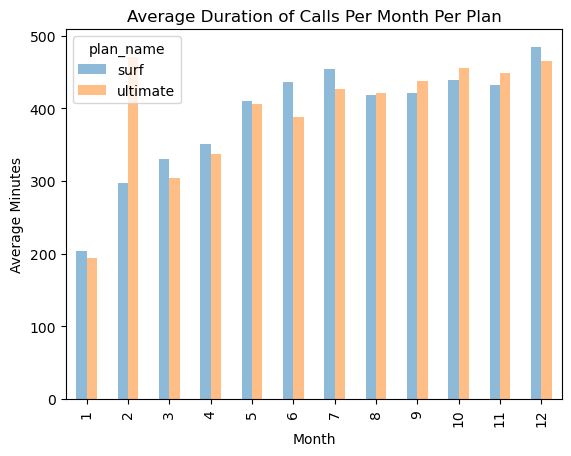

In [132]:
#Plotting a bar plot
monthly_df.pivot_table(index='plan_name', columns='month', values='duration_per_month', aggfunc='mean').T.plot(kind='bar', alpha=.5)

plt.title('Average Duration of Calls Per Month Per Plan')
plt.xlabel('Month')
plt.ylabel('Average Minutes')

plt.show()

Overall, February has the largest difference between average call duration. Average duration of calls is going up as the year and months go on. There is a mix between the two plans of which has a higher average call duration.

In [135]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# Create individual dataframes for surf and ultimate plans
surf = monthly_df[monthly_df['plan_name'] == 'surf']
ultimate = monthly_df[monthly_df['plan_name'] == 'ultimate']
# Printing the results
display(surf.head(10))
ultimate.head(10)

,user_id,month,number_of_calls_per_month,duration_per_month,number_of_texts_per_month,gb_used_per_month,first_name,last_name,age,city,...,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
1,1001,8,27.0,182.0,30.0,21.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
2,1001,9,49.0,315.0,44.0,41.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
3,1001,10,65.0,393.0,53.0,50.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
4,1001,11,64.0,426.0,36.0,49.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
5,1001,12,56.0,412.0,44.0,55.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
6,1002,10,11.0,59.0,15.0,15.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
7,1002,11,55.0,386.0,32.0,45.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
8,1002,12,47.0,384.0,41.0,37.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
9,1003,12,149.0,1104.0,50.0,53.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
10,1004,5,21.0,193.0,7.0,14.0,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20


,user_id,month,number_of_calls_per_month,duration_per_month,number_of_texts_per_month,gb_used_per_month,first_name,last_name,age,city,...,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,12,16.0,124.0,11.0,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
19,1006,11,2.0,10.0,15.0,7.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18 00:00:00,1000,30720,3000,70,7,0.01,0.01,70
20,1006,12,9.0,59.0,139.0,62.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18 00:00:00,1000,30720,3000,70,7,0.01,0.01,70
26,1008,10,71.0,476.0,21.0,48.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
27,1008,11,63.0,446.0,37.0,56.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
28,1008,12,85.0,634.0,26.0,40.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
46,1011,6,19.0,118.0,21.0,19.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
47,1011,7,63.0,499.0,53.0,58.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
48,1011,8,61.0,486.0,54.0,58.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
49,1011,9,73.0,484.0,60.0,45.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70


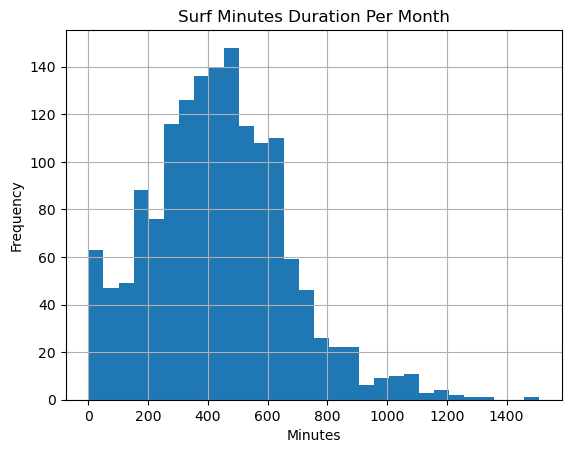

In [137]:
# Plotting histogram for minutes each month users requrired on surf plan
surf.hist('duration_per_month', bins = 30)
plt.title('Surf Minutes Duration Per Month')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.show()

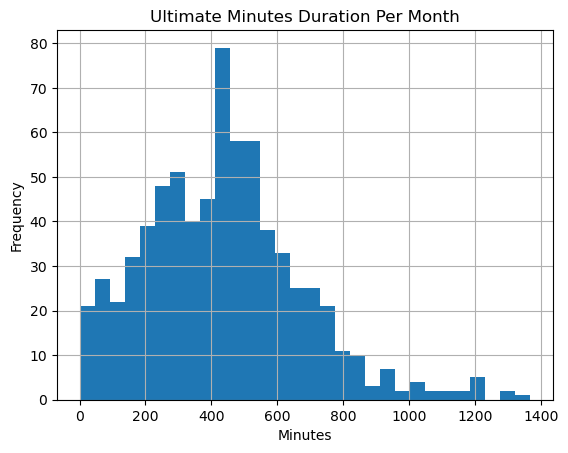

In [139]:
# Plotting histogram for minutes each month users required on ultimate plan
ultimate.hist('duration_per_month', bins = 30)
plt.title('Ultimate Minutes Duration Per Month')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.show()

By comparison, most surf plan users require between 250 and 625 minutes per month while the majority of ultimate plan users require between 225 and 500. 

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [141]:
# Calculate the mean and the variance of the monthly call duration
# Means of surf and ultimate plan monthly call duration
surf_mean = surf['duration_per_month'].mean()
ultimate_mean = ultimate['duration_per_month'].mean()
# Variance of surf and ultimate plan monthly call duration
surf_variance = np.var(surf['duration_per_month'])
ultimate_variance = np.var(ultimate['duration_per_month'])

print("The mean of the Monthly Call Duration on the Surf Plan is:", surf_mean)
print("The mean of the Monthly Call Duration on the Ultimate Plan is:", ultimate_mean)
print()
print("The variance of the Monthly Call Duration on the Surf Plan is:", surf_variance)
print("The variance of the Monthly Call Duration on the Ultimate Plan is:", ultimate_variance)

The mean of the Monthly Call Duration on the Surf Plan is: 436.51974110032364
The mean of the Monthly Call Duration on the Ultimate Plan is: 434.67601683029454

The variance of the Monthly Call Duration on the Surf Plan is: 52537.036665305
The variance of the Monthly Call Duration on the Ultimate Plan is: 56494.2863392536


With both the means and variances being similar in each plan, users on each the surf and ultimate plans require a similar amount of calling minutes per month.

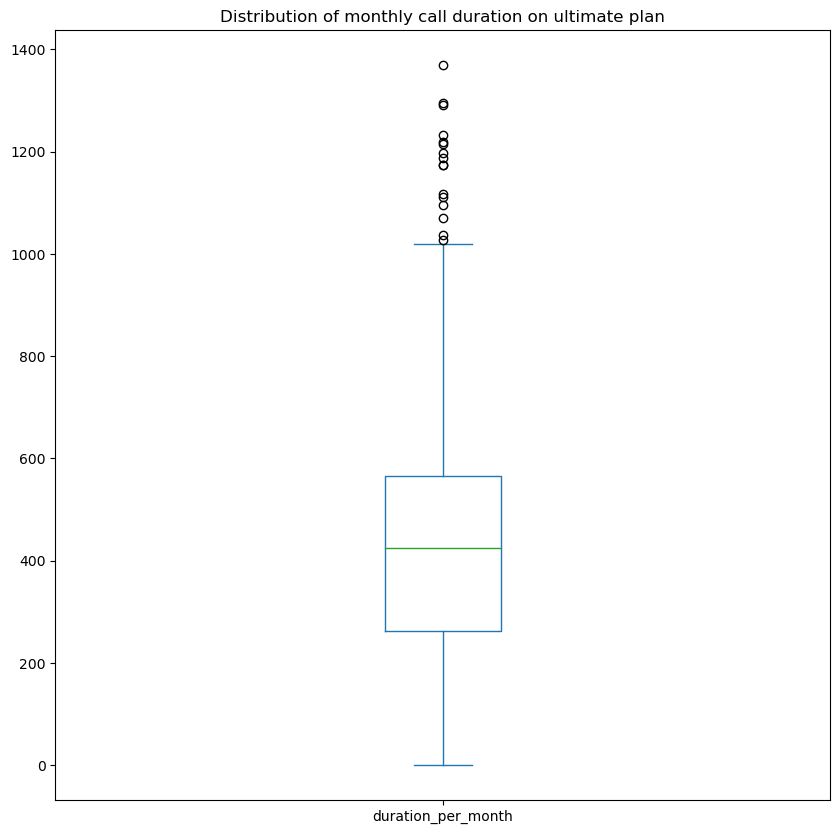

In [143]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Plotting boxplot for Ultimate Plan
ultimate['duration_per_month'].plot(kind='box', title='Distribution of monthly call duration on ultimate plan', figsize=(10,10))
plt.show()

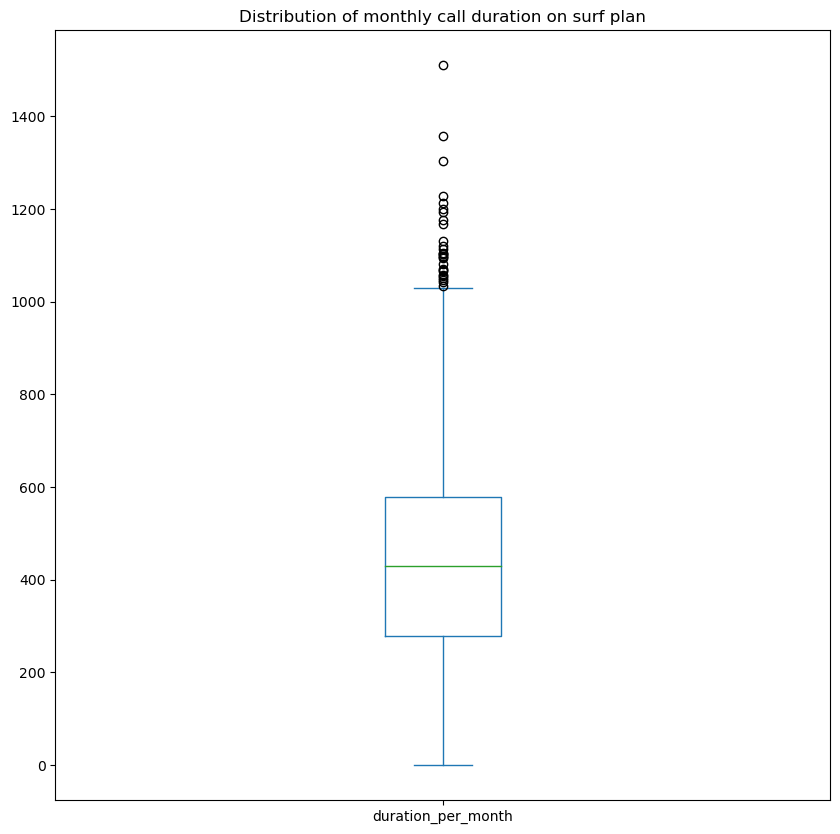

In [145]:
# Plotting boxplot for Surf Plan
surf['duration_per_month'].plot(kind='box', title='Distribution of monthly call duration on surf plan', figsize=(10,10))
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

In [147]:
# Compare the number of messages users of each plan tend to send each month
monthly_df.pivot_table(index='plan_name', columns='month', values='number_of_texts_per_month', aggfunc='mean').T


plan_name,surf,ultimate
month,,
1,21.000000,20.666667
2,21.600000,25.166667
3,21.937500,34.714286
4,24.166667,28.937500
5,33.017857,44.333333
6,33.616438,36.289474
7,35.945055,41.212766
8,37.596774,47.929825
9,39.523179,45.901408


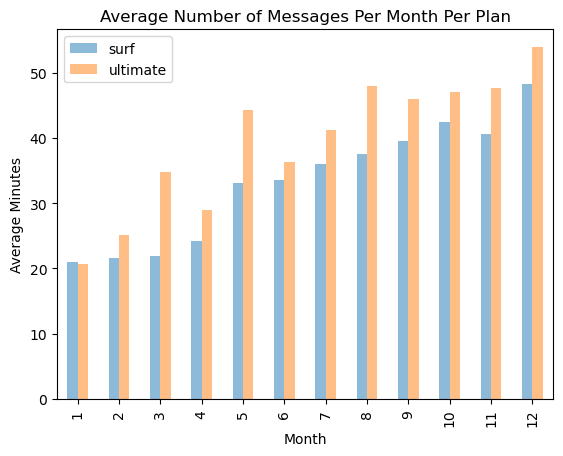

In [149]:
#Plotting a bar plot
monthly_df.pivot_table(index='plan_name', columns='month', values='number_of_texts_per_month', aggfunc='mean').T.plot(kind='bar', alpha=.5)

plt.title('Average Number of Messages Per Month Per Plan')
plt.xlabel('Month')
plt.ylabel('Average Minutes')
plt.legend()
plt.show()



From the chart we see that users on the Ultimate plan consistently send more texts per month on average than users on the Surf plan, except for the month of January when it is very close. 

In [152]:
# Means of surf and ultimate plan number of texts per month
surf_mean_messages = surf['number_of_texts_per_month'].mean()
ultimate_mean_messages = ultimate['number_of_texts_per_month'].mean()
# Variance of surf and ultimate plan monthly number of texts 
surf_variance_messages = np.var(surf['number_of_texts_per_month'])
ultimate_variance_messages = np.var(ultimate['number_of_texts_per_month'])

print("The mean of the texts per month on the Surf Plan is:", surf_mean_messages)
print("The mean of the texts per month on the Ultimate Plan is:", ultimate_mean_messages)
print()
print("The variance of the texts per month on the Surf Plan is:", surf_variance_messages)
print("The variance of the texts per month on the Ultimate Plan is:", ultimate_variance_messages)

The mean of the texts per month on the Surf Plan is: 40.10965630114566
The mean of the texts per month on the Ultimate Plan is: 46.29623287671233

The variance of the texts per month on the Surf Plan is: 1090.4511506183703
The variance of the texts per month on the Ultimate Plan is: 1083.3249173156323


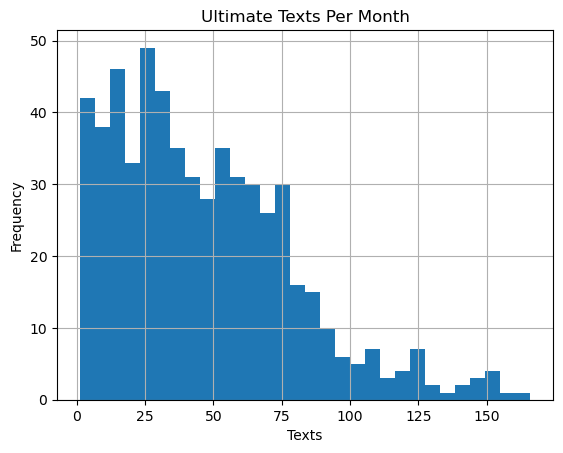

In [154]:
# Plotting histogram for texts each month on ultimate plan
ultimate.hist('number_of_texts_per_month', bins = 30)
plt.title('Ultimate Texts Per Month')
plt.xlabel('Texts')
plt.ylabel('Frequency')

plt.show()

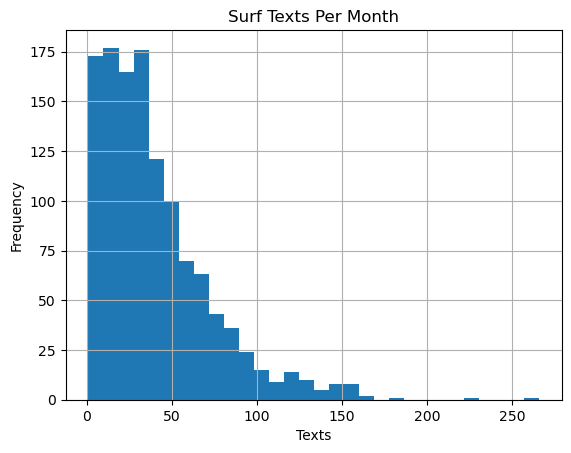

In [156]:
# Plotting histogram for texts each month on surf plan
surf.hist('number_of_texts_per_month', bins = 30)
plt.title('Surf Texts Per Month')
plt.xlabel('Texts')
plt.ylabel('Frequency')

plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

Users on the ultimate plan tend to text more per month on average then users on the surf plan. That being said, the ultimate plan includes more messages per month in the monthly price of $70. 

### Internet

In [162]:
monthly_df.head()

,user_id,month,number_of_calls_per_month,duration_per_month,number_of_texts_per_month,gb_used_per_month,first_name,last_name,age,city,...,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,12,16.0,124.0,11.0,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
1,1001,8,27.0,182.0,30.0,21.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
2,1001,9,49.0,315.0,44.0,41.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
3,1001,10,65.0,393.0,53.0,50.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
4,1001,11,64.0,426.0,36.0,49.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20


In [164]:
# Compare the amount of internet traffic consumed by users per plan
monthly_df.pivot_table(index='plan_name', columns='month', values='gb_used_per_month', aggfunc='mean').T


plan_name,surf,ultimate
month,,
1,14.000000,15.250000
2,30.000000,39.714286
3,31.260870,40.250000
4,29.469388,38.428571
5,34.289474,39.310345
6,38.305263,35.851064
7,40.600000,39.644068
8,41.037736,42.619718
9,40.430052,40.465116


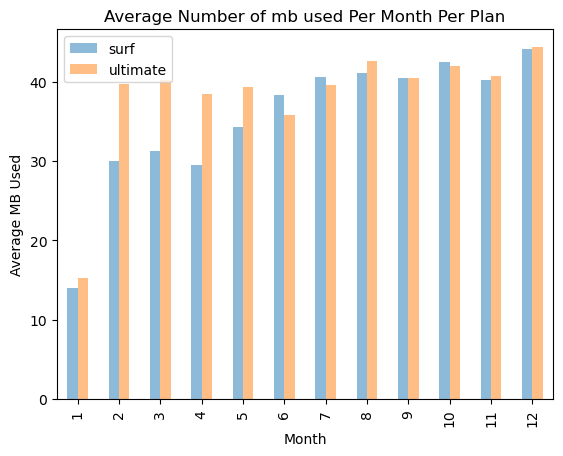

In [166]:
monthly_df.pivot_table(index='plan_name', columns='month', values='gb_used_per_month', aggfunc='mean').T.plot(kind='bar', alpha=.5)

plt.title('Average Number of mb used Per Month Per Plan')
plt.xlabel('Month')
plt.ylabel('Average MB Used')
plt.legend()
plt.show()


In [168]:
# Means of surf and ultimate plan number of mb per month
surf_mean_mb = surf['gb_used_per_month'].mean()
ultimate_mean_mb = ultimate['gb_used_per_month'].mean()
# Variance of surf and ultimate plan monthly number of texts 
surf_variance_mb = np.var(surf['gb_used_per_month'])
ultimate_variance_mb = np.var(ultimate['gb_used_per_month'])

print("The mean of the gb usd per month on the Surf Plan is:", surf_mean_mb)
print("The mean of the gb used per month on the Ultimate Plan is:", ultimate_mean_mb)
print()
print("The variance of the gb used per month on the Surf Plan is:", surf_variance_mb)
print("The variance of the gb used per month on the Ultimate Plan is:", ultimate_variance_mb)

The mean of the gb usd per month on the Surf Plan is: 40.526957637997434
The mean of the gb used per month on the Ultimate Plan is: 41.13769123783032

The variance of the gb used per month on the Surf Plan is: 305.5304029391551
The variance of the gb used per month on the Ultimate Plan is: 270.84752234694736


[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

While the mean mb used per month is clearly higher on the Ultimate Plan, the users on the Surf Plan are on average exceeding their monthly limit of 15,360 mb per month. 

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [172]:
monthly_df.pivot_table(index='plan_name', columns='month', values='monthly_revenue', aggfunc='mean').T

plan_name,surf,ultimate
month,,
1,20,70
2,20,70
3,20,70
4,20,70
5,20,70
6,20,70
7,20,70
8,20,70
9,20,70


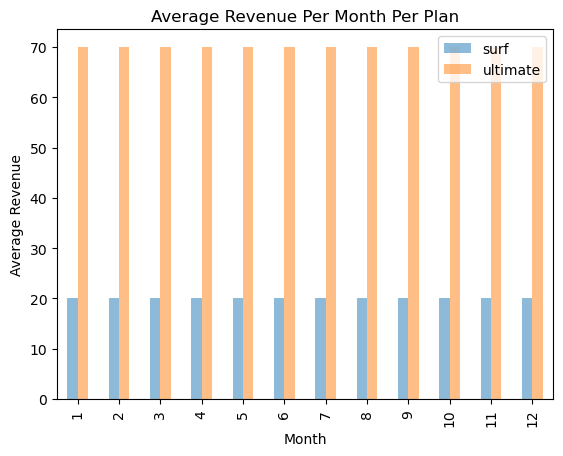

In [174]:
(monthly_df.pivot_table(index='plan_name', columns='month', values='monthly_revenue', aggfunc='mean').T).plot(kind='bar', alpha=.5)

plt.title('Average Revenue Per Month Per Plan')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.legend()
plt.show()

The reason that the revenue is higher every month for the surf plan is that although the base fee is lower, users tend to exceed their monthly allotment of either minutes, mbs, and/or texts leading to additional charges. While the ultimate plan has higher initial fees, it includes higher amounts of minutes, mbs and texts and users go over much less. 

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Correct interpretation 

In [182]:
# Test the hypotheses
#Ho = avg revenue from the two plans is not different
#Ha = avg revenue from the two plans is different

alpha = .05

s1 = surf['monthly_revenue']
s2 = ultimate['monthly_revenue']

results = st.ttest_ind(s1, s2)

print('pvalue: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')


pvalue:  0.0
We reject the null hypothesis


C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Here, because our P-value is much smaller than .05 (our alpha value), we reject the null hypothesis that the monthly revenue average from the two plans is the same. Thus, as shown earlier, the revenues from surf plan are much higher monthly on average than on the ultimate plan.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [187]:
monthly_df.sample(15)

,user_id,month,number_of_calls_per_month,duration_per_month,number_of_texts_per_month,gb_used_per_month,first_name,last_name,age,city,...,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
187,1046,10,81.0,576.0,27.0,63.0,Beata,Hooper,67,"Boston-Cambridge-Newton, MA-NH MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
595,1128,6,6.0,45.0,25.0,37.0,Lucius,Fernandez,41,"Knoxville, TN MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
870,1185,9,73.0,591.0,NaN,62.0,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN MSA",...,ultimate,Service not stopped,1000,30720,3000,70,7,0.01,0.01,70
235,1055,7,38.0,274.0,79.0,41.0,Patrick,Mclean,52,"Portland-Vancouver-Hillsboro, OR-WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
1505,1334,3,20.0,134.0,1.0,5.0,Donovan,Horton,34,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
534,1114,9,87.0,633.0,95.0,24.0,Esta,Estes,55,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
339,1072,12,71.0,420.0,18.0,66.0,Seymour,Spence,66,"Dallas-Fort Worth-Arlington, TX MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
1806,1396,9,40.0,307.0,39.0,50.0,Ardelia,Benton,65,"Salt Lake City, UT MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
1202,1259,6,19.0,124.0,32.0,3.0,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20
685,1147,11,119.0,808.0,33.0,55.0,Duncan,Malone,71,"Urban Honolulu, HI MSA",...,surf,Service not stopped,50,15360,500,20,10,0.03,0.03,20


In [189]:
#Create NY/NJ DF and other regions DF
ny = monthly_df[monthly_df['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
other = monthly_df[monthly_df['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']


In [191]:
# Test the hypotheses

#Ho = The avg revenue from NY-NJ users is the same as that from other regions
#Ha = The avg revenues are different

alpha = .05


s3 = ny['monthly_revenue']
s4 = other['monthly_revenue']

results = st.ttest_ind(s3, s4)

print('pvalue:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

pvalue: 7.702978129728407e-11
We reject the null hypothesis


With our P-value being .287, it is much higher than alpha, and so we fail to reject the null hypothesis. This means that the avg monthly revenues in the NY/NJ region are not different from other regions. There is so significant difference.

## General conclusion

In conclusion, there are some differences in revenue and profitability between the two phone plans, Surf and Ultimate.

Overall, the Surf plan is more profitable, mainly because of its low threshold for going over the included limits of megabytes per month, texts and call minutes. 

Finally,  we tested two hypotheses. The first showed us that the avg monthly revenue between the two plans is in fact different. The second showed us that the revenue from the NY/NJ region is not different from that of other regions.